In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/nicochaves/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Read in the VCF Data. Separate out VQSR filter labels and VQSLOD (log-odds ratio of being a true variant using mixture of Gaussians)

In [2]:
data = pd.read_csv('data/preprocessed/vcf_features_with_labels.txt', sep='\t')
passed_vqsr = data['PASSED_VQSR']
data = data.drop(['PASSED_VQSR', 'VQSLOD'], axis=1)

## Reproduce VQSR plot that motivated them to use mixture of gaussian models

### (See slide 8 at https://software.broadinstitute.org/gatk/events/slides/1503/GATKwh6-BP-5-Variant_recalibration.pdf)

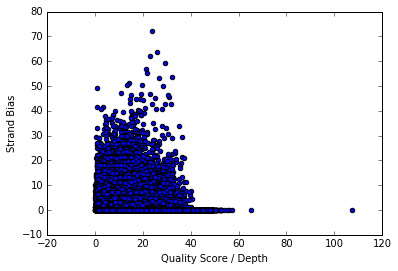

In [17]:
# Column names of relevant fields
# Note: the slides above use a field called SB for estimated strand bias. 
# However, this doesn't seem to exist anymore. It's not in the VCF file
# and not on the GATK website's list of annotations. Instead of SB, use
# FS (or possibly SOR)
depth = 'DP'
quality_score = 'QUAL'
strand_bias = 'FS'  # Fisher's exact test score for strand bias (high value indicates high bias)

depths = data[depth]
qual_scores = data[quality_score]
strand_biases = data[strand_bias]

fig = plt.figure()
plt.xlabel('Quality Score / Depth')
plt.ylabel('Strand Bias')
plt.scatter(qual_scores/depths, strand_biases)



## Filter the Data by Pos/Neg VQSR Filter Labels (It would be better to use the ground truth for these labels though) 

In [ ]:
# Kolmogorov Smirnov Normality Test

from scipy import stats
import numpy as np

x = np.linspace(-15, 15, 9)
stats.kstest(x, 'norm')